In [1]:
# Importing the librarie and loading the csv file to the dataframe
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import re 
import seaborn as sns
df=pd.read_csv('heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [2]:
# checking for missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
# replacing missing values with the median
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mode())


In [4]:
# replacing missing values with the median
df['thalch']=df['thalch'].fillna(df['thalch'].median())
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())
df['ca']=df['ca'].fillna(df['ca'].median())
df['trestbps']=df['trestbps'].fillna(df['trestbps'].median())
df


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,0.0,NaN,1
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,NaN,0.5,NaN,0.0,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,0.0,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,NaN,0.5,NaN,0.0,NaN,0


In [5]:
#replacing missing values in the cholesterol column by the median
df['chol']=df['chol'].fillna(df['chol'].median())

In [6]:
#replacing missing values in the fbs column by the forward fill method
df['fbs']=df['fbs'].fillna(method='ffill')
df

C:\Users\WIYLANYUY BLAISE\AppData\Local\Temp\ipykernel_13196\2461768011.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['fbs']=df['fbs'].fillna(method='ffill')
C:\Users\WIYLANYUY BLAISE\AppData\Local\Temp\ipykernel_13196\2461768011.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs']=df['fbs'].fillna(method='ffill')


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,0.0,NaN,1
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,NaN,0.5,NaN,0.0,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,0.0,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,NaN,0.5,NaN,0.0,NaN,0


In [7]:
#replacing missing values in the restscg column by the forward fill method
df['restecg']=df['restecg'].fillna(method='ffill')

C:\Users\WIYLANYUY BLAISE\AppData\Local\Temp\ipykernel_13196\1426062088.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['restecg']=df['restecg'].fillna(method='ffill')


In [8]:
# CHECKING FOR DUPLICATE 
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head(10))

Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []


In [9]:
# replacing missing categorical data using the forward fill method
df['thal']=df['thal'].fillna(method='ffill')
df['slope']=df['slope'].fillna(method='ffill')
df['exang']=df['exang'].fillna(method='ffill')
df

C:\Users\WIYLANYUY BLAISE\AppData\Local\Temp\ipykernel_13196\4236416681.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['thal']=df['thal'].fillna(method='ffill')
C:\Users\WIYLANYUY BLAISE\AppData\Local\Temp\ipykernel_13196\4236416681.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['slope']=df['slope'].fillna(method='ffill')
C:\Users\WIYLANYUY BLAISE\AppData\Local\Temp\ipykernel_13196\4236416681.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['exang']=df['exang'].fillna(method='ffill')
C:\Users\WIYLANYUY BLAISE\AppData\Local\Temp\ipykernel_13196\4236416681.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_o

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,fixed defect,0


In [10]:
# checking the number of unique values in the thal column 
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [11]:
# checking the number of unique values in  the restecg column 
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [12]:
# checking the number of unique values in  the slope column 
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [13]:
# checking the number of unique values in the cp column 
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [14]:
# creating a new dataframe with only numerical variables from the orginal dataframe to calculate the correlation betweent the variables
ndf=df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']]

In [15]:
# summary statistic of the dataframe 
ndf.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652
std,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


<Axes: >

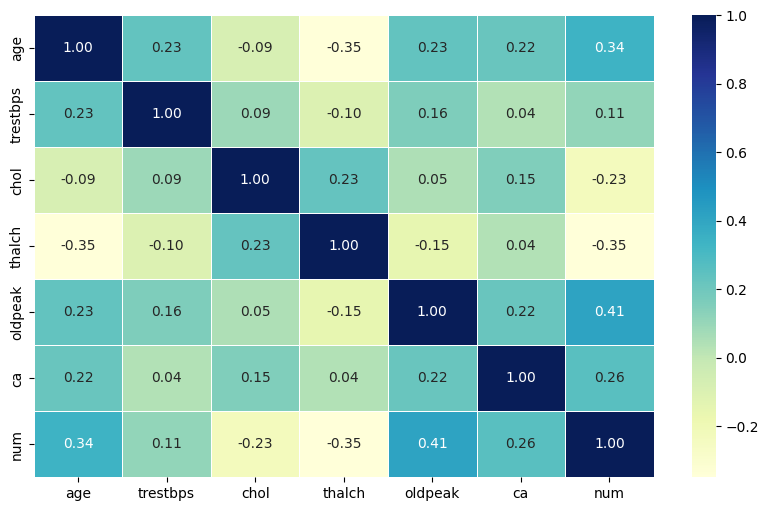

In [16]:
#visulizing the correlation using hit map
corr_matrix =ndf.corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,fmt=".2f",
                cmap="YlGnBu")

In [17]:
# DATA VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

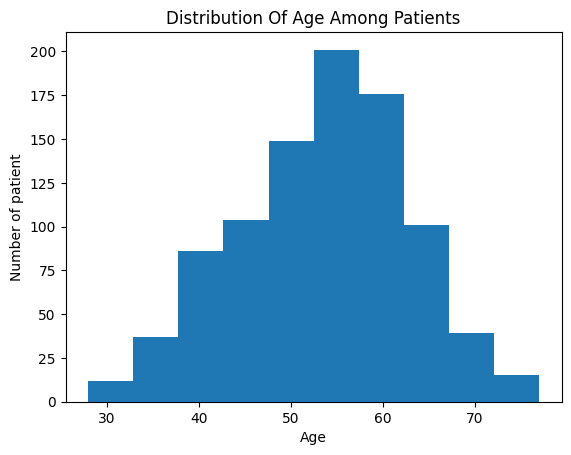

In [18]:
#1 distribution of age among patience using histograme 
df['age'].plot.hist()
plt.title('Distribution Of Age Among Patients')
plt.xlabel('Age')
plt.ylabel('Number of patient')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

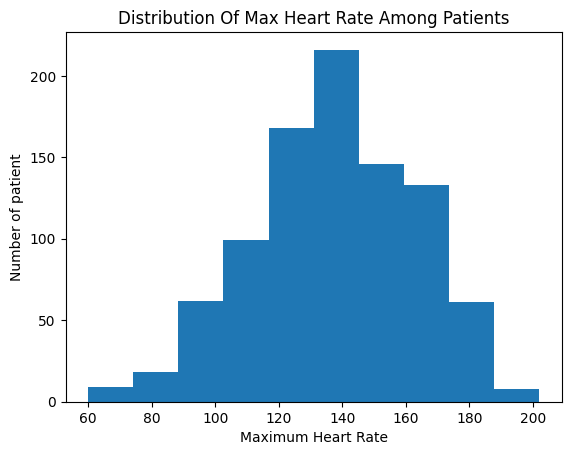

In [19]:
#1 distribution of choletorol among patience using histograme 
df['thalch'].plot.hist()
plt.title('Distribution Of Max Heart Rate Among Patients')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Number of patient')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

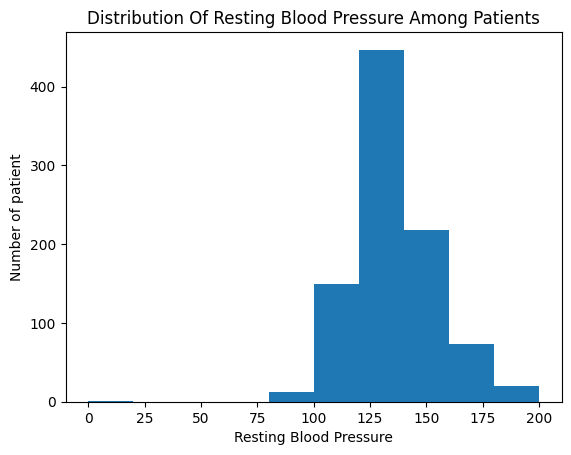

In [20]:
# distribution of 'trestbps' (resting blood pressure) among patients using histograms.
df['trestbps'].plot.hist()
plt.title('Distribution Of Resting Blood Pressure Among Patients')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Number of patient')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

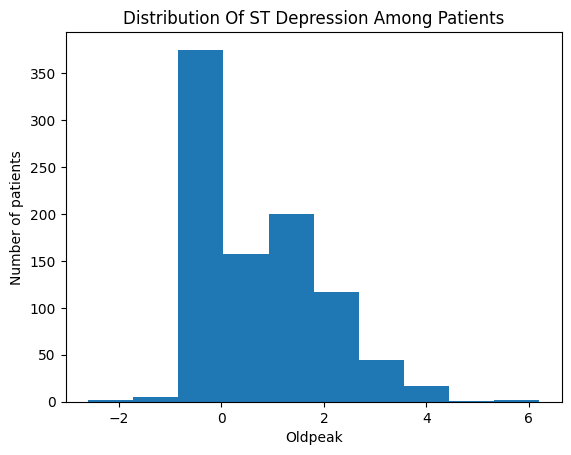

In [21]:
#1 distribution of choletorol among patience using histograme 
df['oldpeak'].plot.hist()
plt.title('Distribution Of ST Depression Among Patients')
plt.xlabel('Oldpeak')
plt.ylabel('Number of patients')
plt.show

In [22]:
# CHECKING FOR OUTLIERS

<function matplotlib.pyplot.show(close=None, block=None)>

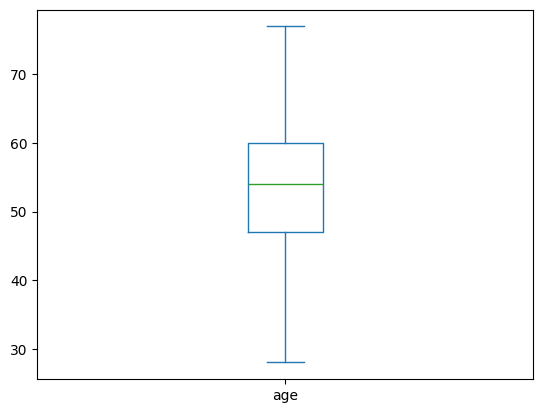

In [23]:
# checking the presence of outliers in the age column using boxplot
df['age'].plot.box()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

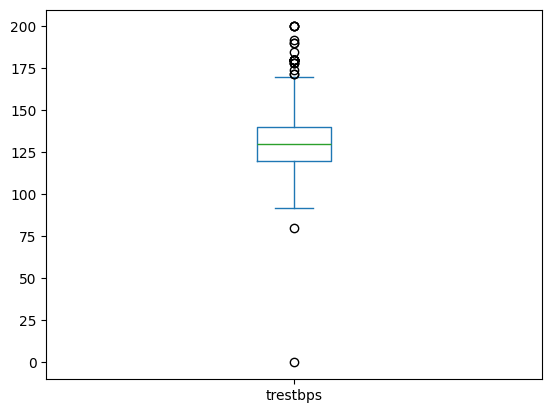

In [24]:
# Checking for outliers in the trestbps column using boxplot
df['trestbps'].plot.box()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

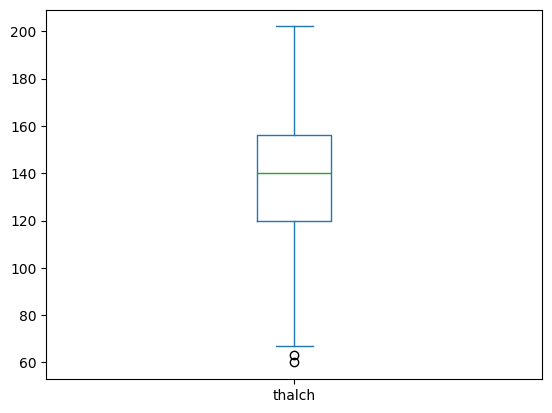

In [25]:
#checking for outliers in the thalch column using boxplot
df['thalch'].plot.box()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

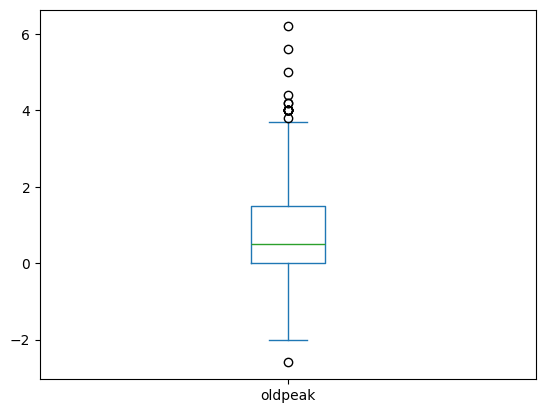

In [26]:
#checking outliers in the oldpeak column using boxplot
df['oldpeak'].plot.box()
plt.show

In [27]:
# 3 Create bar plots to show the distribution of 'sex' among patients with and without heart disease.

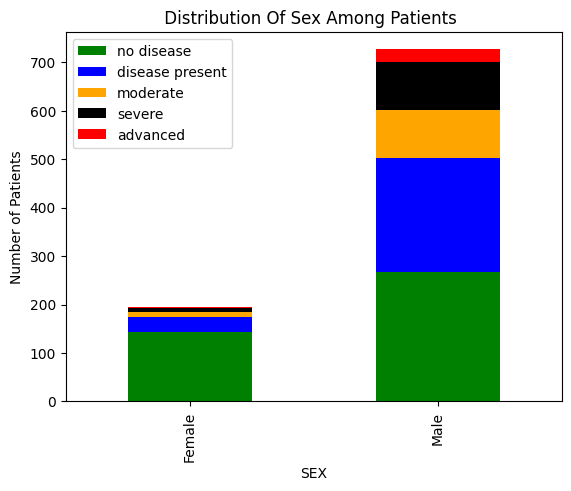

In [28]:
# creating variable to group by sex and num
grouped=df.groupby(['sex', 'num']).size().unstack()
# ploting the bar to show distribution( sex among patients)
grouped.plot(kind="bar", stacked=True, color=['green', 'blue','orange', 'black', 'red'])
plt.title(" Distribution Of Sex Among Patients  ")
plt.xlabel("SEX")
plt.ylabel('Number of Patients')
plt.legend(['no disease','disease present','moderate','severe','advanced'])
plt.show()

In [29]:
#Creating a new column , Agegroug from the age column
bins =[28, 44, 59, 77]
labels =['Young', 'Midle_age', 'Elderly']
df['agegroup']=pd.cut(df['age'], bins=bins, labels=labels)
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,agegroup
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Elderly
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Elderly
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Elderly
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Young
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1,Midle_age
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0,Elderly
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2,Midle_age
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,fixed defect,0,Midle_age


C:\Users\WIYLANYUY BLAISE\AppData\Local\Temp\ipykernel_13196\132034297.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d_agegroup=df.groupby(['agegroup', 'num']).size().unstack()


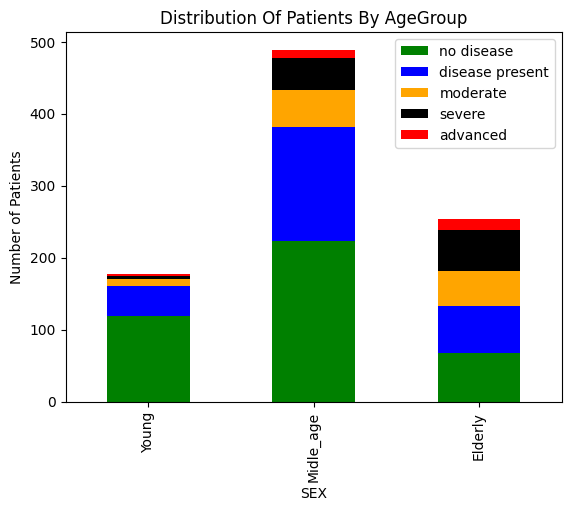

In [30]:
# creating variable to group by agegroup and num
d_agegroup=df.groupby(['agegroup', 'num']).size().unstack()
# ploting the bar to show distribution( agegroup among patients)
d_agegroup.plot(kind="bar", stacked=True, color=['green', 'blue','orange', 'black', 'red'])
plt.xlabel("SEX")
plt.ylabel('Number of Patients')
plt.legend(['no disease','disease present','moderate','severe','advanced'])
plt.title('Distribution Of Patients By AgeGroup')
plt.show()

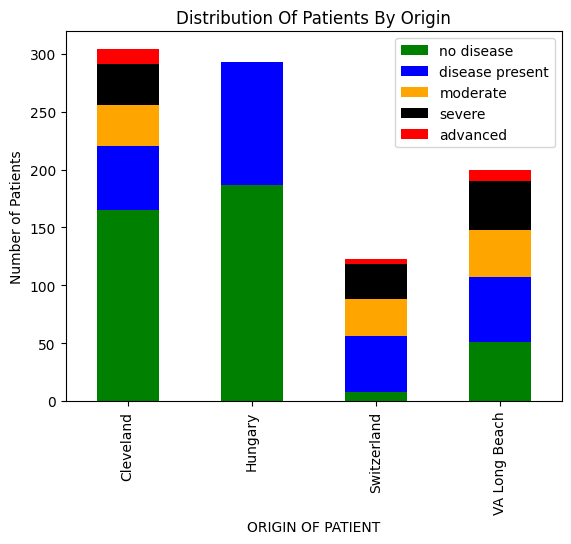

In [31]:
# creating variable to group by agegroup and num
d_agegroup=df.groupby(['dataset', 'num']).size().unstack()
# ploting the bar to show distribution( Origin among patients)
d_agegroup.plot(kind="bar", stacked=True, color=['green', 'blue','orange', 'black', 'red'])
plt.title('Distribution Of Patients By Origin')
plt.xlabel("ORIGIN OF PATIENT")
plt.ylabel('Number of Patients')
plt.legend(['no disease','disease present','moderate','severe','advanced'])
plt.show()

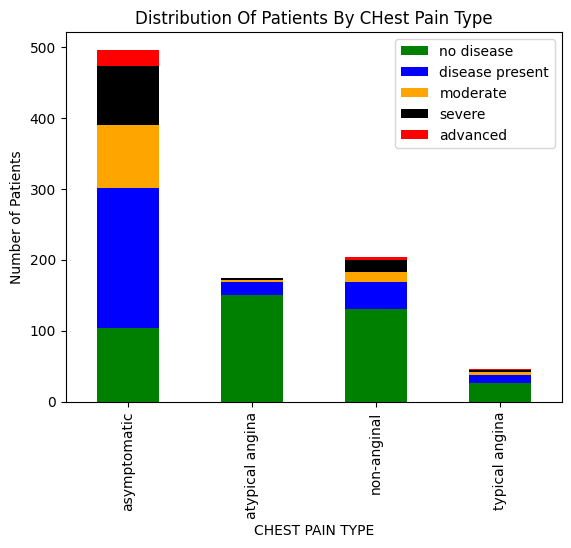

In [32]:
# creating variable to group by agegroup and num
d_agegroup=df.groupby(['cp', 'num']).size().unstack()
# ploting the bar to show distribution( cp among patients)
d_agegroup.plot(kind="bar", stacked=True, color=['green', 'blue','orange', 'black', 'red'])
plt.title('Distribution Of Patients By CHest Pain Type')
plt.xlabel("CHEST PAIN TYPE")
plt.ylabel('Number of Patients')
plt.legend(['no disease','disease present','moderate','severe','advanced'])
plt.show()

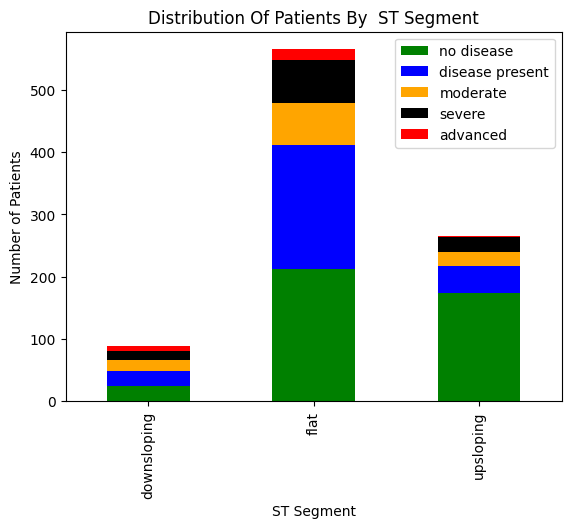

In [33]:
# creating variable to group by agegroup and num
d_agegroup=df.groupby(['slope', 'num']).size().unstack()
# ploting the bar to show distribution( ST segment among patients)
d_agegroup.plot(kind="bar", stacked=True, color=['green', 'blue','orange', 'black', 'red'])
plt.title('Distribution Of Patients By  ST Segment')
plt.xlabel("ST Segment")
plt.ylabel('Number of Patients')
plt.legend(['no disease','disease present','moderate','severe','advanced'])
plt.show()

In [34]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,agegroup
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Elderly
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Elderly
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Elderly
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Young
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1,Midle_age
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0,Elderly
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2,Midle_age
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,fixed defect,0,Midle_age


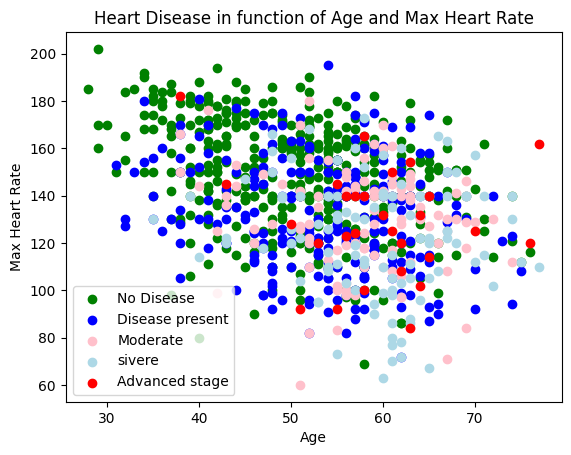

In [35]:
# Compare Age vs max Heart Rate(thalch) using scattergram
plt.scatter(df.age[df.num==0],df.thalch[df.num==0],c="green")
plt.scatter(df.age[df.num==1],df.thalch[df.num==1],c="blue")
plt.scatter(df.age[df.num==2],df.thalch[df.num==2],c="pink")
plt.scatter(df.age[df.num==3],df.thalch[df.num==3],c="lightblue")
plt.scatter(df.age[df.num==4],df.thalch[df.num==4],c="red")
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel('Max Heart Rate')
plt.legend(['No Disease', 'Disease present', 'Moderate', 'sivere', 'Advanced stage'])

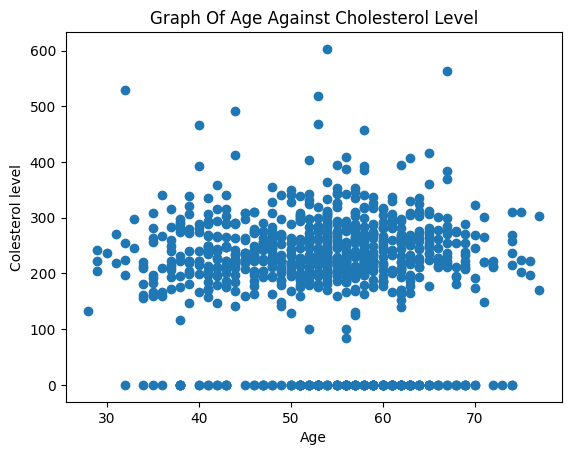

In [36]:
#Comparing Age And Chol Level using a scattergram
plt.scatter(df['age'], df['chol'])
plt.title("Graph Of Age Against Cholesterol Level")
plt.xlabel('Age')
plt.ylabel("Colesterol level")
plt.show()


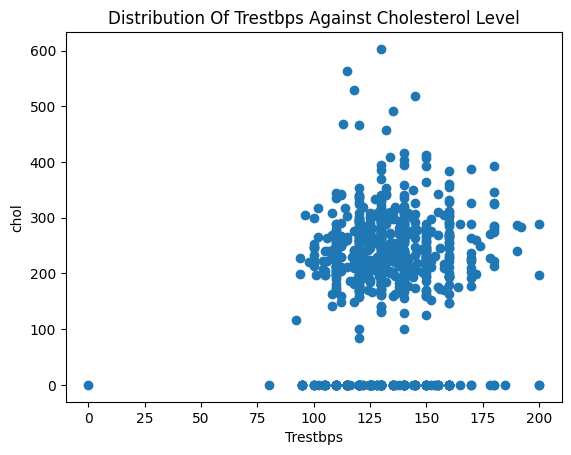

In [37]:
# scatter plot displaying the relationship between  sex, age ,num
plt.scatter(df['trestbps'], df['chol'])
plt.title("Distribution Of Trestbps Against Cholesterol Level")
plt.xlabel("Trestbps")
plt.ylabel("chol")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

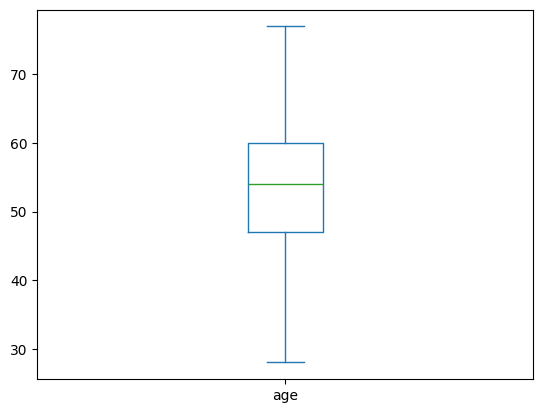

In [38]:
# checking the presence of outliers in the age column
df['age'].plot.box()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

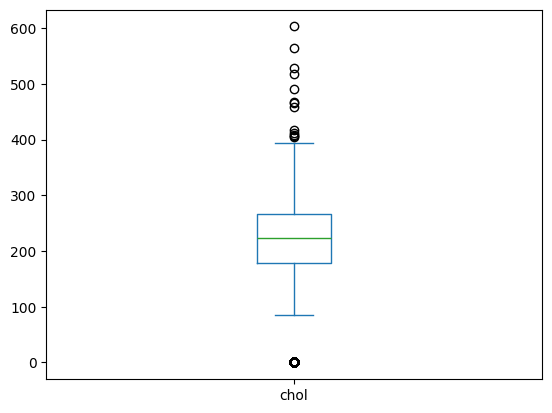

In [39]:
#Checking the presence of outliers in the chol column
df['chol'].plot.box()
plt.show

In [40]:
bins =[28, 44, 59, 77]
labels =['Young', 'Midle_age', 'Elderly']
df['agegroup']=pd.cut(df['age'], bins=bins, labels=labels)


In [41]:
lamb= lambda chol: 1 if chol>200 else 0
df['binary_col']=df['chol'].apply(lamb)


In [42]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,agegroup,binary_col
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Elderly,1
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,Elderly,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Elderly,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Young,1
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Young,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1,Midle_age,1
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0,Elderly,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2,Midle_age,1
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,fixed defect,0,Midle_age,1


In [43]:
# DATA PREPROCESSING AND FEATURE ENGINEERING

In [44]:
# handling categoeical data  using  mapping

In [45]:
# making the thal column numerical to be able to calculate the correlation
df['thal']= df['thal'].map({'fixed defect':1, 'normal':2, 'reversable defect':3})
df['thal'].astype(int)

0      1
1      2
2      3
3      2
4      2
      ..
915    2
916    2
917    1
918    1
919    1
Name: thal, Length: 920, dtype: int32

In [46]:
# making the SL  Slope column numerical using maping to be able to calculate the correlation
df['slope']= df['slope'].map({'downsloping':1, 'flat':2, 'upsloping':3})
df['slope'].astype(int)

0      1
1      2
2      2
3      1
4      3
      ..
915    2
916    2
917    2
918    2
919    2
Name: slope, Length: 920, dtype: int32

In [47]:
# making the restecg column numerical to be able to calculate the correlation(using maping)
df['restecg']= df['restecg'].map({'lv hypertrophy':1, 'normal':2, 'st-t abnormality':3})
df['restecg'].astype(int)

0      1
1      1
2      1
3      2
4      1
      ..
915    3
916    3
917    3
918    1
919    1
Name: restecg, Length: 920, dtype: int32

In [48]:
# changing the datatype of the cp column from categorical to numerical data using maping
df['cp']= df['cp'].map({'typical angina':1, 'asymptomatic':2, 'non-anginal':3, 'atypical angina':4})
df['cp'].astype(int)

0      1
1      2
2      2
3      3
4      4
      ..
915    2
916    1
917    2
918    2
919    4
Name: cp, Length: 920, dtype: int32

In [49]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,agegroup,binary_col
0,1,63,Male,Cleveland,1,145.0,233.0,True,1,150.0,False,2.3,1,0.0,1,0,Elderly,1
1,2,67,Male,Cleveland,2,160.0,286.0,False,1,108.0,True,1.5,2,3.0,2,2,Elderly,1
2,3,67,Male,Cleveland,2,120.0,229.0,False,1,129.0,True,2.6,2,2.0,3,1,Elderly,1
3,4,37,Male,Cleveland,3,130.0,250.0,False,2,187.0,False,3.5,1,0.0,2,0,Young,1
4,5,41,Female,Cleveland,4,130.0,204.0,False,1,172.0,False,1.4,3,0.0,2,0,Young,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,2,127.0,333.0,True,3,154.0,False,0.0,2,0.0,2,1,Midle_age,1
916,917,62,Male,VA Long Beach,1,130.0,139.0,False,3,140.0,False,0.5,2,0.0,2,0,Elderly,0
917,918,55,Male,VA Long Beach,2,122.0,223.0,True,3,100.0,False,0.0,2,0.0,1,2,Midle_age,1
918,919,58,Male,VA Long Beach,2,130.0,385.0,True,1,140.0,False,0.5,2,0.0,1,0,Midle_age,1


In [50]:
# EXPLORATORY DATA ANALYSIS
# OBSEVING PARTENS USING CROSSS-TABULATION

In [51]:
# Calculating summary statistics 
df.describe()

,id,age,cp,trestbps,chol,restecg,thalch,oldpeak,slope,ca,thal,num,binary_col
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,2.550000,131.995652,199.908696,1.990217,137.692391,0.853261,2.192391,0.227174,2.330435,0.995652,0.669565
std,265.725422,9.424685,0.852379,18.451300,109.040171,0.631863,25.145235,1.058049,0.590961,0.628936,0.716317,1.142693,0.470626
min,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,60.000000,-2.600000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,230.750000,47.000000,2.000000,120.000000,177.750000,2.000000,120.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,460.500000,54.000000,2.000000,130.000000,223.000000,2.000000,140.000000,0.500000,2.000000,0.000000,2.000000,1.000000,1.000000
75%,690.250000,60.000000,3.000000,140.000000,267.000000,2.000000,156.000000,1.500000,3.000000,0.000000,3.000000,2.000000,1.000000
max,920.000000,77.000000,4.000000,200.000000,603.000000,3.000000,202.000000,6.200000,3.000000,3.000000,3.000000,4.000000,1.000000


In [52]:
#1 Calculating summary statistics (mean, median, standard deviation, etc.) for 'age' and 'thalach' among patients with different chest pain types ('cp').
df.groupby('cp')[['age', 'thalch']].describe()

age                                                       thalch  \
    count       mean        std   min    25%   50%    75%   max  count   
cp                                                                       
1    46.0  54.826087  11.449026  30.0  46.25  59.0  62.75  74.0   46.0   
2   496.0  54.959677   8.763468  31.0  49.00  56.0  61.00  77.0  496.0   
3   204.0  53.333333   9.589951  33.0  47.00  53.5  60.00  76.0  204.0   
4   174.0  49.241379   9.232971  28.0  42.00  50.5  55.00  74.0  174.0   

                                                              
          mean        std   min    25%    50%     75%    max  
cp                                                            
1   148.695652  22.518999  98.0  134.5  145.0  168.00  190.0  
2   129.495968  23.430964  60.0  113.0  130.0  144.00  186.0  
3   144.284314  24.943040  70.0  130.0  146.0  163.00  194.0  
4   150.419540  22.067994  93.0  140.0  151.0  165.75  202.0

In [53]:
df.groupby('agegroup')[['age', 'thalch']].describe()

C:\Users\WIYLANYUY BLAISE\AppData\Local\Temp\ipykernel_13196\3199705895.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('agegroup')[['age', 'thalch']].describe()


age                                                    thalch  \
           count       mean       std   min   25%   50%   75%   max  count   
agegroup                                                                     
Young      177.0  39.389831  3.688204  29.0  37.0  40.0  42.0  44.0  177.0   
Midle_age  489.0  52.946830  4.058642  45.0  50.0  54.0  56.0  59.0  489.0   
Elderly    253.0  64.581028  4.029450  60.0  62.0  63.0  67.0  77.0  253.0   

                                                                    
                 mean        std   min    25%    50%    75%    max  
agegroup                                                            
Young      153.870056  22.888814  80.0  138.0  155.0  172.0  202.0  
Midle_age  136.441718  24.046854  60.0  120.0  140.0  155.0  195.0  
Elderly    128.604743  23.269852  63.0  113.0  132.0  143.0  179.0

In [54]:
# Compare num column with sex column
pd.crosstab(df.num,df.sex)

sex,Female,Male
num,,
0,144,267
1,30,235
2,10,99
3,8,99
4,2,26


In [55]:
# Compare num column with chest pain column
pd.crosstab(df.num,df.cp)

cp,1,2,3,4
num,,,,
0,26,104,131,150
1,12,197,37,19
2,4,89,14,2
3,3,83,18,3
4,1,23,4,0


In [56]:
# Compare num column with fasting blood sugar column
pd.crosstab(df.num,df.fbs)

fbs,False,True
num,,
0,366,45
1,219,46
2,82,27
3,79,28
4,23,5


In [57]:
# Compare num column with resting electrocardiovascular results column
pd.crosstab(df.num,df.restecg)

restecg,1,2,3
num,,,
0,82,268,61
1,45,172,48
2,22,55,32
3,26,50,31
4,13,8,7


In [58]:
# Compare num column with thal column
pd.crosstab(df.num,df.thal)

thal,1,2,3
num,,,
0,51,247,113
1,47,58,160
2,17,23,69
3,15,16,76
4,4,4,20


In [59]:
# Compare num column with good or bad cholesterol level column
pd.crosstab(df.num,df.binary_col)

binary_col,0,1
num,,
0,102,309
1,88,177
2,55,54
3,49,58
4,10,18


In [60]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,agegroup,binary_col
0,1,63,Male,Cleveland,1,145.0,233.0,True,1,150.0,False,2.3,1,0.0,1,0,Elderly,1
1,2,67,Male,Cleveland,2,160.0,286.0,False,1,108.0,True,1.5,2,3.0,2,2,Elderly,1
2,3,67,Male,Cleveland,2,120.0,229.0,False,1,129.0,True,2.6,2,2.0,3,1,Elderly,1
3,4,37,Male,Cleveland,3,130.0,250.0,False,2,187.0,False,3.5,1,0.0,2,0,Young,1
4,5,41,Female,Cleveland,4,130.0,204.0,False,1,172.0,False,1.4,3,0.0,2,0,Young,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,2,127.0,333.0,True,3,154.0,False,0.0,2,0.0,2,1,Midle_age,1
916,917,62,Male,VA Long Beach,1,130.0,139.0,False,3,140.0,False,0.5,2,0.0,2,0,Elderly,0
917,918,55,Male,VA Long Beach,2,122.0,223.0,True,3,100.0,False,0.0,2,0.0,1,2,Midle_age,1
918,919,58,Male,VA Long Beach,2,130.0,385.0,True,1,140.0,False,0.5,2,0.0,1,0,Midle_age,1
